In [1]:
# Vinayak Chawdimani, vinay2020c@gmail.com
# Data features are as follows
# frequency, in Hertzs, used as input.
# angle_of_attack, in degrees, used as input.
# chord_length, in meters, used as input.
# free_stream_velocity, in meters per second, used as input.
# suction_side_displacement_thickness, in meters, used as input.
# scaled_sound_pressure_level, in decibels, used as the target.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
raw = pd.read_csv('aerofoilnoise.csv')
print(raw['frequency'].median(), raw['frequency'].max(), raw['frequency'].min())
print(raw['frequency'].count())
raw.info()

1600.0 20000 200
1503
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 6 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   frequency                            1503 non-null   int64  
 1   angle_of_attack                      1503 non-null   float64
 2   chord_length                         1503 non-null   float64
 3   free_stream_velocity                 1503 non-null   float64
 4   suction_side_displacement_thickness  1503 non-null   float64
 5   scaled_sound_pressure_level          1503 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 70.6 KB


(array([  4.,   6.,  16.,  27.,  32.,  47.,  71.,  81., 101., 113., 126.,
        146., 168., 168., 151., 110.,  76.,  42.,  11.,   7.]),
 array([103.38   , 105.26035, 107.1407 , 109.02105, 110.9014 , 112.78175,
        114.6621 , 116.54245, 118.4228 , 120.30315, 122.1835 , 124.06385,
        125.9442 , 127.82455, 129.7049 , 131.58525, 133.4656 , 135.34595,
        137.2263 , 139.10665, 140.987  ]),
 <BarContainer object of 20 artists>)

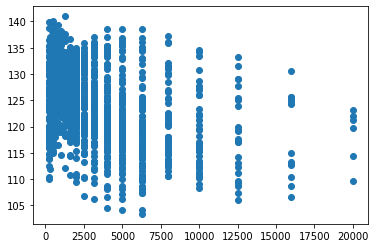

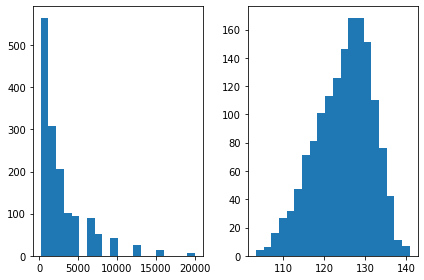

In [3]:
# check data distribution
x = raw['frequency']
y = raw['scaled_sound_pressure_level']
plt.scatter(x,y)
plt.show
fig, axs = plt.subplots(1, 2, tight_layout=True)
# We can set the number of bins with the `bins` kwarg
axs[0].hist(x, bins=20)
axs[1].hist(y, bins=20)

In [4]:
# correlate features with target
raw.corr()['scaled_sound_pressure_level']

frequency                             -0.390711
angle_of_attack                       -0.156108
chord_length                          -0.236162
free_stream_velocity                   0.125103
suction_side_displacement_thickness   -0.312670
scaled_sound_pressure_level            1.000000
Name: scaled_sound_pressure_level, dtype: float64

array([[<AxesSubplot:xlabel='frequency', ylabel='frequency'>,
        <AxesSubplot:xlabel='scaled_sound_pressure_level', ylabel='frequency'>],
       [<AxesSubplot:xlabel='frequency', ylabel='scaled_sound_pressure_level'>,
        <AxesSubplot:xlabel='scaled_sound_pressure_level', ylabel='scaled_sound_pressure_level'>]],
      dtype=object)

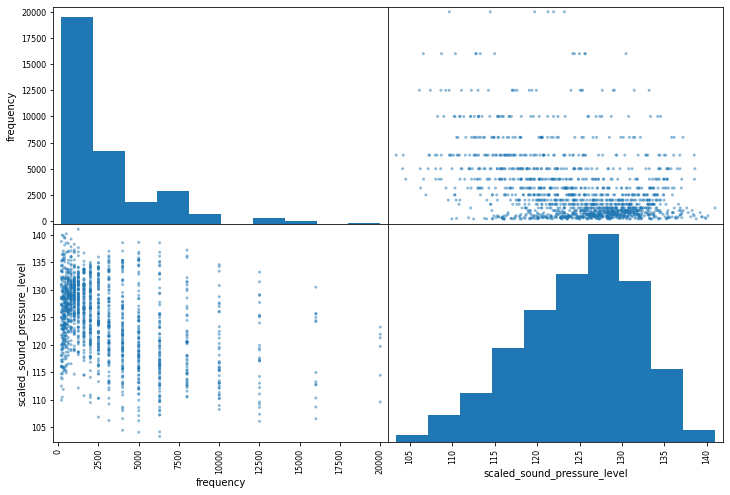

In [5]:
#plot correlations
from pandas.plotting import scatter_matrix
scatter_matrix(raw[['frequency','scaled_sound_pressure_level']], figsize=(12, 8))

In [6]:
#Balancing frequncy maximum to 10000
print('frequency median ',raw['frequency'].median())
print('frequency max ', raw['frequency'].max())
bal_freq = []
def balance_freq():
    for i in range(raw.shape[0]):
        if raw['frequency'][i] > 10000:
            bal_freq.append(10000)
        else:
            bal_freq.append(raw['frequency'][i])
balance_freq()
print('bal_freq ', len(bal_freq))
# print(bal_freq)

frequency median  1600.0
frequency max  20000
bal_freq  1503


In [7]:
# put balanced freq in raw data
raw['frequency'] = bal_freq
raw['frequency'].max()

10000

angle shape  (1503,)
angle max  22.2
angle min 0.0
angle uniques [0.0, 1.5, 2.0, 2.7, 3.0, 3.3, 4.0, 4.2, 4.8, 5.3, 5.4, 6.7, 7.2, 7.3, 8.4, 8.9, 9.5, 9.9, 11.2, 12.3, 12.6, 12.7, 15.4, 15.6, 17.4, 19.7, 22.2]


(array([329.,  87., 139., 114., 135.,   0., 130.,  43., 152.,   0.,  28.,
        130.,   0.,  65.,  30.,  63.,   0.,  28.,   0.,  30.]),
 array([ 0.  ,  1.11,  2.22,  3.33,  4.44,  5.55,  6.66,  7.77,  8.88,
         9.99, 11.1 , 12.21, 13.32, 14.43, 15.54, 16.65, 17.76, 18.87,
        19.98, 21.09, 22.2 ]),
 <BarContainer object of 20 artists>)

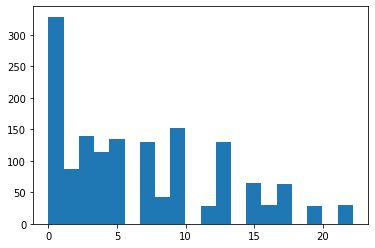

In [8]:
# exploring angle of attack
print('angle shape ',raw['angle_of_attack'].shape)
print('angle max ', raw['angle_of_attack'].max())
print('angle min', raw['angle_of_attack'].min())
print('angle uniques', sorted(raw['angle_of_attack'].unique()))
plt.hist(raw['angle_of_attack'], bins=20)

chord shape  (1503,)
chord max  0.3048
chord min 0.0254
chord uniques [0.0254, 0.0508, 0.1016, 0.1524, 0.2286, 0.3048]


(array([278., 237.,   0.,   0.,   0., 263.,   0.,   0.,   0., 271.,   0.,
          0.,   0.,   0., 266.,   0.,   0.,   0.,   0., 188.]),
 array([0.0254 , 0.03937, 0.05334, 0.06731, 0.08128, 0.09525, 0.10922,
        0.12319, 0.13716, 0.15113, 0.1651 , 0.17907, 0.19304, 0.20701,
        0.22098, 0.23495, 0.24892, 0.26289, 0.27686, 0.29083, 0.3048 ]),
 <BarContainer object of 20 artists>)

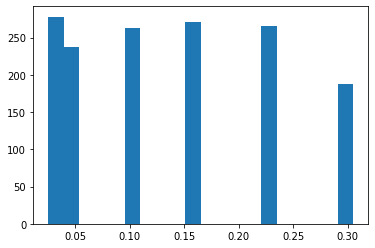

In [9]:
# exploring chord length
print('chord shape ',raw['chord_length'].shape)
print('chord max ', raw['chord_length'].max())
print('chord min', raw['chord_length'].min())
print('chord uniques', sorted(raw['chord_length'].unique()))
plt.hist(raw['chord_length'], bins=20)

vel shape  (1503,)
vel max  71.3
vel min 31.7
vel uniques [31.7, 39.6, 55.5, 71.3]


(array([281.,   0.,   0., 480.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0., 277.,   0.,   0.,   0.,   0.,   0.,   0., 465.]),
 array([31.7 , 33.68, 35.66, 37.64, 39.62, 41.6 , 43.58, 45.56, 47.54,
        49.52, 51.5 , 53.48, 55.46, 57.44, 59.42, 61.4 , 63.38, 65.36,
        67.34, 69.32, 71.3 ]),
 <BarContainer object of 20 artists>)

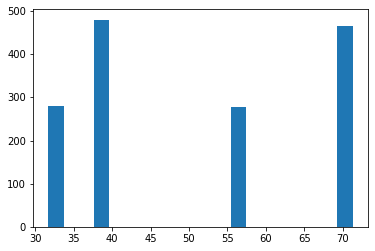

In [10]:
# exploring free_stream_velocity
print('vel shape ',raw['free_stream_velocity'].shape)
print('vel max ', raw['free_stream_velocity'].max())
print('vel min', raw['free_stream_velocity'].min())
print('vel uniques', sorted(raw['free_stream_velocity'].unique()))
plt.hist(raw['free_stream_velocity'], bins=20)

suction_side_displacement_thickness shape  (1503,)
suction_side_displacement_thickness max  0.0584113
suction_side_displacement_thickness min 0.000400682
suction_side_displacement_thickness uniques [0.000400682, 0.00041229, 0.000428464, 0.000439472, 0.000740478, 0.00076193, 0.000791822, 0.000812164, 0.000848633, 0.000873218, 0.000907475, 0.000930789, 0.00121072, 0.00131983, 0.00142788, 0.00146332, 0.00150092, 0.00152689, 0.0015988, 0.00172668, 0.00193287, 0.00202822, 0.00209405, 0.00214345, 0.002211, 0.00229336, 0.00243851, 0.00245138, 0.00251435, 0.00253511, 0.00266337, 0.0027238, 0.00283081, 0.00293031, 0.00294804, 0.00310138, 0.00313525, 0.00331266, 0.00336729, 0.00346574, 0.00372371, 0.00392107, 0.00400603, 0.00401199, 0.00420654, 0.00425727, 0.0042862, 0.0043284, 0.00433288, 0.00449821, 0.00452492, 0.00461377, 0.00473801, 0.00478288, 0.00485029, 0.00495741, 0.00497773, 0.00509068, 0.0051942, 0.0052139, 0.00525474, 0.00529514, 0.00544854, 0.00566229, 0.00578076, 0.00579636, 0.00580

(array([490., 446.,  33.,  48.,  96.,  77.,  16.,  62.,  33.,  48.,   0.,
         30.,  30.,  16.,  30.,   0.,  16.,   0.,  16.,  16.]),
 array([0.00040068, 0.00330121, 0.00620174, 0.00910227, 0.01200281,
        0.01490334, 0.01780387, 0.0207044 , 0.02360493, 0.02650546,
        0.02940599, 0.03230652, 0.03520705, 0.03810758, 0.04100811,
        0.04390865, 0.04680918, 0.04970971, 0.05261024, 0.05551077,
        0.0584113 ]),
 <BarContainer object of 20 artists>)

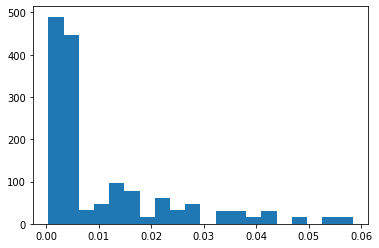

In [11]:
# exploring suction_side_displacement_thickness
print('suction_side_displacement_thickness shape ',raw['suction_side_displacement_thickness'].shape)
print('suction_side_displacement_thickness max ', raw['suction_side_displacement_thickness'].max())
print('suction_side_displacement_thickness min', raw['suction_side_displacement_thickness'].min())
print('suction_side_displacement_thickness uniques', sorted(raw['suction_side_displacement_thickness'].unique()))
plt.hist(raw['suction_side_displacement_thickness'], bins=20)

In [12]:
# creating inputs & scaling targets by dividing by 100
raw_inputs = raw.drop(['scaled_sound_pressure_level'], axis = 1)
targets = np.array(raw['scaled_sound_pressure_level'])
targets /= 100
targets

array([1.26201, 1.25201, 1.25951, ..., 1.06604, 1.06224, 1.04204])

In [13]:
#scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(raw_inputs)
inputs = scaler.transform(raw_inputs)

In [14]:
print('inputs shape ', inputs.shape)

inputs shape  (1503, 5)


In [15]:
# split data
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(
                inputs, targets, shuffle=True, random_state=8, train_size=0.8)

In [16]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(xtrain, ytrain)
print(reg.score(xtrain, ytrain))
print(reg.intercept_)

0.544060968694724
1.2483581110251192


In [17]:
# use tensorflow
# export data
np.savez('tfdata', xtrain=xtrain, ytrain=ytrain, xtest=xtest, ytest=ytest)

In [18]:
npz = np.load('tfdata.npz')

In [19]:
print(npz['xtrain'].shape, npz['ytrain'].shape, npz['xtest'].shape, npz['ytest'].shape)

(1202, 5) (1202,) (301, 5) (301,)


In [20]:
# see you in tensorflow!